# Starters :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib notebook
np.random.seed(7)

In [2]:
train = pd.read_csv('weather_data_train.csv')
flight_data = pd.read_csv('flight_data_train.csv')
test = pd.read_csv('weather_data_test.csv')
print("Training data dimension =", train.shape)
print("Testing data dimension =", test.shape)

print("Flight Data dimension =", flight_data.shape)

Training data dimension = (2183, 1126)
Testing data dimension = (100, 1126)
Flight Data dimension = (2183, 865)


# Data Preprocessing

## Weather data 

There are 5 stations each having values of 5 measurements (Dew Point, Pressure, Temperature, Wind Speed & Wind Direction) taken at 45 different heights.

Here we can see there are lot of attributes. For every height and every unique attribute, i.e. Dew Point, Pressure, Temperature, Wind Speed & Wind Direction, I am going to take average of all the measurements and normalize them using StandardScaler.

In [3]:
train.head()

,Day_Id,Station1 Dew Point Height1,Station1 Dew Point Height2,Station1 Dew Point Height3,Station1 Dew Point Height4,Station1 Dew Point Height5,Station1 Dew Point Height6,Station1 Dew Point Height7,Station1 Dew Point Height8,Station1 Dew Point Height9,...,Station5 Wind Speed Height36,Station5 Wind Speed Height37,Station5 Wind Speed Height38,Station5 Wind Speed Height39,Station5 Wind Speed Height40,Station5 Wind Speed Height41,Station5 Wind Speed Height42,Station5 Wind Speed Height43,Station5 Wind Speed Height44,Station5 Wind Speed Height45
0,1,7.351064,7.328571,6.866540,6.410266,5.918868,5.309172,4.687870,4.066568,2.283636,...,52.213144,52.923623,53.634103,54.344583,55.055062,55.765542,56.264822,56.660079,57.093960,57.765101
1,2,2.086769,0.948308,-0.190154,-1.763636,-5.848000,-8.795752,-9.963894,-11.132035,-12.300177,...,3.924168,3.739211,3.554254,3.369297,3.184340,2.999383,2.814427,2.629470,2.444513,2.259556
2,3,2.014286,1.657143,1.400000,1.400000,0.407164,-0.727164,-1.861493,-2.995821,-4.086486,...,15.656836,15.388740,15.120643,14.882979,14.670213,14.457447,14.244681,14.031915,13.819149,13.606383
3,4,0.249462,-0.153846,-1.998723,-3.843600,-4.712595,-4.903435,-5.094275,-5.502703,-6.427273,...,39.408068,38.748642,38.089216,37.429791,36.770365,36.110939,35.451513,34.792087,34.132661,33.473235
4,5,2.827496,2.179510,1.599225,1.211628,0.824031,0.443396,0.066038,-0.311321,-0.688679,...,50.925714,50.354286,50.000000,50.000000,50.000000,49.557377,49.010929,50.613169,52.259259,53.762376


In [4]:
#data.columns[[1+45, 1*225+1+45]]

In [5]:
unique_cols = ['Dew Point', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed']

data = pd.concat([train, test])

In [6]:
df = pd.DataFrame({'Day_Id': data['Day_Id']})

In [7]:
# becoz there are 45 heights
# we are averaging the measurements for each height
for i in range(1, 46):
        
    # jth attribute in ['Dew Point', 'Pressure', 'Temperature', 'Wind Direction', 'Wind Speed']
    for j in range(5):
        cols = []
        
        # kth station in 5 stations
        for k in range(5):
            cols.append(i + (j*45) + (k*225))
    
        # dataframe with particular attribute at height 'i'
        attr = data[data.columns[cols]]
        df['Height'+ str(i) + ' '+ unique_cols[j]] = (attr.sum(axis=1))/5

In [8]:
del data

df.head()

,Day_Id,Height1 Dew Point,Height1 Pressure,Height1 Temperature,Height1 Wind Direction,Height1 Wind Speed,Height2 Dew Point,Height2 Pressure,Height2 Temperature,Height2 Wind Direction,...,Height44 Dew Point,Height44 Pressure,Height44 Temperature,Height44 Wind Direction,Height44 Wind Speed,Height45 Dew Point,Height45 Pressure,Height45 Temperature,Height45 Wind Direction,Height45 Wind Speed
0,1,4.728577,964.958323,6.447514,247.263217,8.771911,4.682900,953.345627,8.158180,259.964326,...,-28.520711,565.192409,-12.041683,259.702655,45.729270,-29.447279,557.926770,-12.801308,259.342564,46.068019
1,2,0.698801,964.385487,3.022143,107.078704,3.056338,0.501372,952.603988,3.091514,117.135882,...,-40.574540,561.870794,-12.648780,199.653187,7.705102,-39.886056,554.475092,-13.437847,205.645363,7.750151
2,3,2.317797,968.995897,3.941303,171.831942,6.028479,1.695845,957.173778,3.880528,165.346581,...,-18.994508,563.198453,-14.808179,220.897279,13.818924,-19.759187,555.759575,-15.055036,246.634114,13.694736
3,4,0.102967,970.289878,3.741646,145.674917,11.418549,-0.395776,958.443662,3.414333,140.222883,...,-31.927095,564.168351,-14.833564,51.791383,39.598377,-32.833140,556.731546,-15.495311,50.498654,39.598017
4,5,0.916018,943.181640,4.521426,169.909035,9.883194,0.023401,931.642792,4.131550,195.236438,...,-35.006217,541.402934,-22.892360,269.429289,49.069894,-35.796811,533.931331,-23.665981,269.877300,49.643589


So we brought down the no. of attributes from 

In [9]:
from sklearn.preprocessing import StandardScaler

cols = df.columns
cols = cols[1:]
sc = StandardScaler()

for c in cols:
    df[[c]] = sc.fit_transform(df[[c]])   

In [10]:
train_rows = train.shape[0]
train = df[:train_rows]
test = df[train_rows:]

del df

In [11]:
train.shape, test.shape

((2183, 226), (100, 226))

## Flight Data

There are 288 spots for paragliding. Flight details for each spot include max distance, total distance, number of flights that took place at that spot on a particular day. The decision whether a day is Good/Bad is taken on number of flights on that particular day. Precisely,
- if total flights on a day >= 15 , then 'Good' day
- else 'Bad' day

In [12]:
flight_data.head()

,Day_Id,Spot1 maxDistance,Spot1 totalDistance,Spot1 totalFlights,Spot2 maxDistance,Spot2 totalDistance,Spot2 totalFlights,Spot3 maxDistance,Spot3 totalDistance,Spot3 totalFlights,...,Spot285 totalFlights,Spot286 maxDistance,Spot286 totalDistance,Spot286 totalFlights,Spot287 maxDistance,Spot287 totalDistance,Spot287 totalFlights,Spot288 maxDistance,Spot288 totalDistance,Spot288 totalFlights
0,1,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
1,2,23.84,41.82,2,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
2,3,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
3,4,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
4,5,24.40,48.20,2,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0


I am just going to see the number of flights per spot and removing the other variables.

In [13]:
flights = pd.DataFrame({'Day_Id': flight_data.Day_Id})
offset = 3

# becoz there are 288 spots, so the range is 1 to 288.
for i in range(1, 289):
    flights['Spot'+str(i)+'_totalFlights'] = flight_data[flight_data.columns[offset]]
    offset += 3
        
del flight_data

Now create a new column representing the day (good/Bad

In [14]:
day_id = flights.pop('Day_Id')

In [15]:
total_flights = flights.sum(axis=1)
good_bad = np.where(total_flights >= 15, 1, 0)

In [16]:
flights = pd.DataFrame({'Day_Id': day_id, 'Good_Bad': good_bad})
flights.head()

,Day_Id,Good_Bad
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Labels

Now let's create the labels for the training data. But before that we need to check whether or not all labels are present for each day present in training data. For the missing prediction, I am going to drop that day itself from the training data.

In [17]:
miss = 0

for i in range(train_rows):
    day_id = train.iloc[i]['Day_Id']
    if day_id not in flights['Day_Id']:
        
        # we need to create new dataframe, otherwise it will mess up with the number of rows and index
        new_train = train.drop(train.index[i])
        miss += 1

print("Total", miss, "day id's were missing. Deleted !!")

Total 138 day id's were missing. Deleted !!


In [18]:
# i am going to use binary search to speed up the code little bit.

def binarySearch (arr, l, r, x):
    if r >= l: 
        mid = l + (r - l)//2 
        if arr[mid] == x:
            return mid
        elif arr[mid] > x:
            return binarySearch(arr, l, mid-1, x)
        else:
            return binarySearch(arr, mid+1, r, x)
    
    # this wouldn't be the case but let's write anyway
    else:
        return -1

In [19]:
labels = []
days = flights['Day_Id'].values
days = days.tolist()

for d1 in new_train['Day_Id']:
    index = binarySearch(days, 0, flights.shape[0], d1)
    p = flights.iloc[index]['Good_Bad']
    labels.append(p)

In [20]:
labels = np.array(labels)

In [21]:
# function to annotate values on the bars in countplot

def annotate(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('%d' %(y), (x.mean(), y), ha='center', va='bottom')

<IPython.core.display.Javascript object>


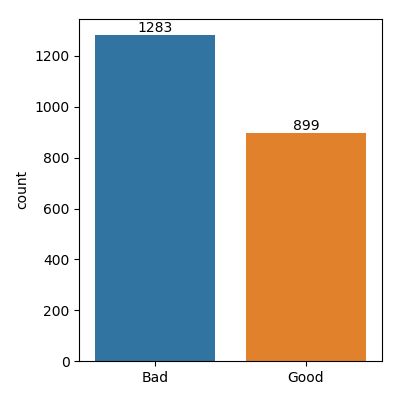

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.countplot(labels, ax=ax)
plt.xticks([0, 1] ,['Bad', 'Good'])
annotate(ax)
plt.tight_layout()

In [23]:
new_train['Good_Bad'] = labels

In [24]:
# let's have a look on our final training data.
new_train.head()

,Day_Id,Height1 Dew Point,Height1 Pressure,Height1 Temperature,Height1 Wind Direction,Height1 Wind Speed,Height2 Dew Point,Height2 Pressure,Height2 Temperature,Height2 Wind Direction,...,Height44 Pressure,Height44 Temperature,Height44 Wind Direction,Height44 Wind Speed,Height45 Dew Point,Height45 Pressure,Height45 Temperature,Height45 Wind Direction,Height45 Wind Speed,Good_Bad
0,1,-0.119910,0.389446,-0.596675,0.470818,0.198874,-0.028941,0.379991,-0.380792,0.486736,...,0.400397,0.096937,0.303945,1.947924,-0.208746,0.404997,0.077952,0.302055,1.916631,0
1,2,-0.740140,0.350660,-1.091694,-0.379641,-0.982819,-0.674705,0.329054,-1.087177,-0.372709,...,0.092903,0.003096,-0.119882,-1.442723,-1.412386,0.084670,-0.020079,-0.079968,-1.446260,0
2,3,-0.490957,0.662828,-0.958861,0.013198,-0.368329,-0.490240,0.642918,-0.977174,-0.082610,...,0.215809,-0.330688,0.030058,-0.897548,0.908338,0.203874,-0.269138,0.211642,-0.924545,0
3,4,-0.831845,0.750442,-0.987714,-0.145489,0.746065,-0.813254,0.730137,-1.042170,-0.233787,...,0.305596,-0.334611,-1.163486,1.401227,-0.599151,0.294076,-0.336944,-1.183742,1.348804,0
4,5,-0.706708,-1.085039,-0.875024,0.001533,0.428631,-0.748520,-1.110612,-0.942177,0.097247,...,-1.801882,-1.580280,0.372596,2.245810,-0.940877,-1.821862,-1.595286,0.377003,2.230434,0


In [25]:
new_train.to_csv('Modified_Training_Data.csv', index=False)
test.to_csv('Modified_Testing_Data.csv', index=False)